# Perceptron Algorithm 
### Learning from Data 1.4 
### CUNY GC Machine Learning
Liam Sweeney

Using an artificial data set, I will build a perceptron model, plot a target function f, and a final hypothesis g, noting the point of convergence. I will change the data set and observe changes to the hypothesis and convergence. I will modify the data to be in ten dimensions instead of two. I will use this data set to run the perceptron experiment 100 times, picking x(t) randomly and will plot a histogram for the number of updates the algorithm takes to converge.  

First, import pandas, numpy, datasets from scikit learn, and matplotlib. Create a dataset using make_blobs. We only need an X as we will generate y separately. I want X to be random and y to be linearly separable. 

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
X, _= datasets.make_blobs(n_samples=20,n_features=2,
                           centers=[[0,1]],cluster_std=3)

In [3]:
y = np.array([0 if a[1] < 1 else 1 for a in X])

In [4]:
print(y)

[1 1 1 1 1 0 0 1 1 1 0 0 1 0 0 1 1 1 1 0]


In [5]:
print(X)

[[ 1.14715482  5.55728328]
 [ 0.66195175  1.09828525]
 [ 4.68586435  4.39763068]
 [ 1.26979359  1.78801041]
 [-1.1748088   3.20389586]
 [-0.43971819  0.47020701]
 [ 2.38123018 -1.12463273]
 [ 2.20680417  4.17061704]
 [-5.5813408   3.66859844]
 [ 2.58024332  4.48102483]
 [ 1.6531371  -3.484471  ]
 [ 1.04123096  0.97644691]
 [ 2.2881585   1.97223757]
 [ 3.38829203 -1.03292239]
 [ 0.40335156  0.10968299]
 [ 0.57824622  1.27188253]
 [-4.87259446  1.69309354]
 [ 1.0991468   1.35677812]
 [ 1.96460647  1.41582887]
 [-1.21930016 -3.13141301]]


Now I will plot the points and add target function, y = 1

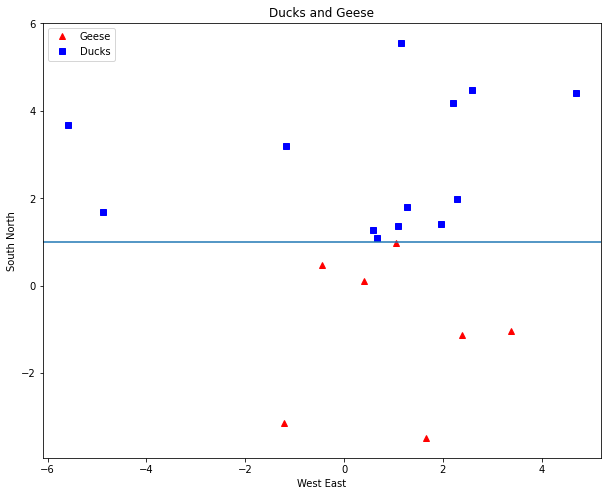

In [6]:
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^', label = "Geese")
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs', label = "Ducks")
plt.axhline(y = 1)
plt.xlabel("West East")
plt.ylabel("South North")
plt.title('Ducks and Geese')
plt.legend(loc="upper left")

First I will create a step function that will be used in the perceptron algorithm to return 0 or 1. 

In [8]:
def step_func(a):
    return 1.0 if (a > 0) else 0.0

Perceptron takes four arguments, X, y, learning rate, and epochs. We define m and n to equal the shape of X. Theta is an added column of zeros. We use an empty array called missed, which will be used to add misses. The algorithm will update ten times, with a learning rate of .5. Y hat is the predicted value of Y. This is where the step function is used. 

In [23]:
def perceptron (X, y, lr, epochs):
    m, n = X.shape
    theta = np.zeros((n+1,1))
    missed = []
    epochs = 10
    lr = .5
    for e in range(epochs):
        miss = 0
        for idx, x_i in enumerate(X):
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)
            y_hat = step_func(np.dot(x_i.T, theta))
            if (np.squeeze(y_hat) - y[idx]) != 0:
                theta += lr*((y[idx] - y_hat)*x_i)
                miss += 1
        missed.append(miss)
    return theta, missed


In [24]:
perceptron(X, y, .5, 10)

(array([[-2.        ],
        [-0.85695434],
        [ 2.76744311]]),
 [3, 2, 2, 3, 1, 4, 2, 1, 0, 0])

Now it's time to plot both the data, the target function and the hypothesis. We see that the target function is a straight line, which we know will be accurate because of how we defined y. Theta produced by PLA finds the appropriate angle that separates the data, based on their distribution in the scatter plot. 

In [10]:
def plot_decision_boundary(X, theta):
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -theta[1]/theta[2]
    c = -theta[0]/theta[2]
    x2 = m*x1 + c
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^', label = "Ducks")
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs', label = "Geese")
    
    plt.axhline(y = 1)
    plt.xlabel("West East")
    plt.ylabel("South North")
    plt.title('Ducks and Geese')
    plt.legend(loc="upper left")
    plt.plot(x1, x2, 'y-')

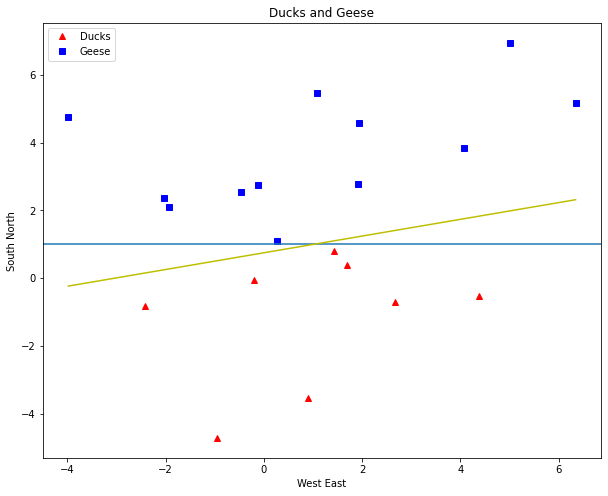

In [10]:
theta, miss_l = perceptron(X, y, 0.5, 10)
plot_decision_boundary(X, theta)


Printing miss_l shows us that PLA misclassified three points in the first epoch and then converged.

In [11]:
print(miss_l)

[5, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### (c) Repeat everything with another random 20.

In [12]:
X, _= datasets.make_blobs(n_samples=20,n_features=2,
                           centers=[[0,1]],cluster_std=1)

In [13]:
y = np.array([0 if a[1] < 1 else 1 for a in X])

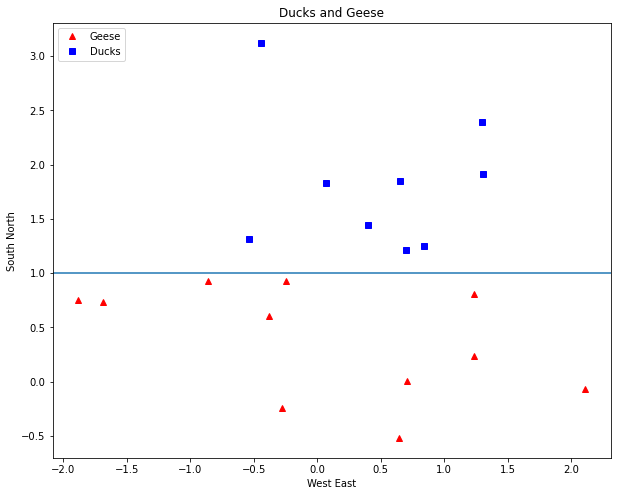

In [14]:
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^', label = "Geese")
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs', label = "Ducks")
plt.axhline(y = 1)
plt.xlabel("West East")
plt.ylabel("South North")
plt.title('Ducks and Geese')
plt.legend(loc="upper left")

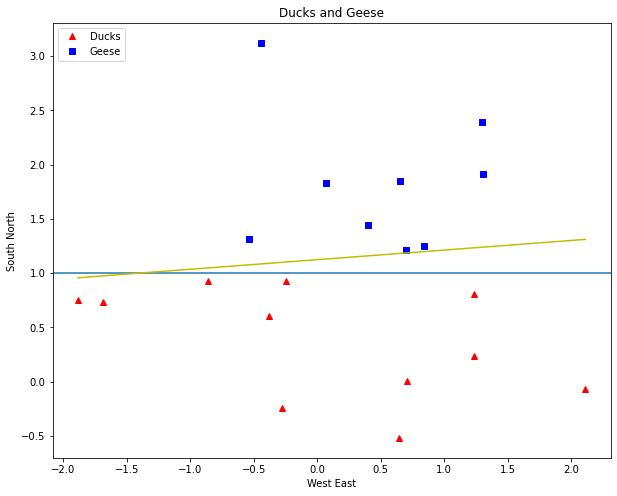

In [15]:
theta, miss_l = perceptron(X, y, 0.5, 10)
plot_decision_boundary(X, theta)

In [16]:
print(miss_l)

[5, 4, 5, 4, 3, 3, 2, 3, 0, 0]


### (d) Repeat with size 100

In [18]:
X, _= datasets.make_blobs(n_samples=100,n_features=2,
                           centers=[[0,3], [0,-3]],cluster_std=1)

In [19]:
y = np.array([0 if a[1] < 1 else 1 for a in X])

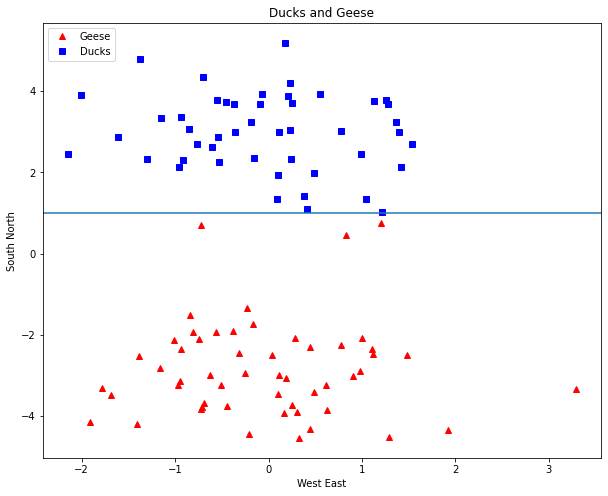

In [20]:
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^', label = "Geese")
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs', label = "Ducks")
plt.axhline(y = 1)
plt.xlabel("West East")
plt.ylabel("South North")
plt.title('Ducks and Geese')
plt.legend(loc="upper left")

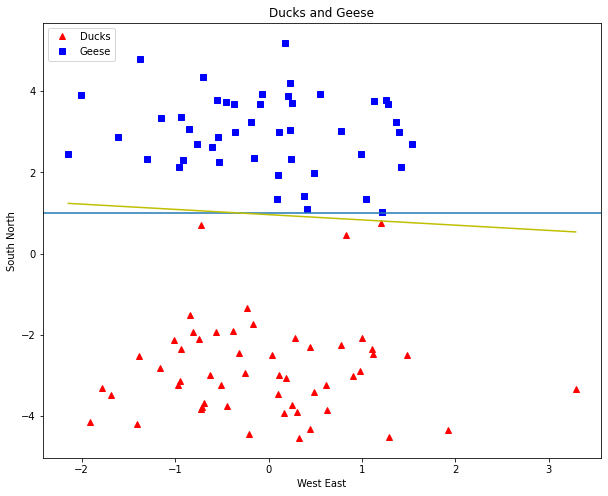

In [21]:
theta, miss_l = perceptron(X, y, 0.5, 100)
plot_decision_boundary(X, theta)

In [22]:
print(miss_l)

[6, 5, 3, 2, 3, 2, 2, 2, 1, 0]


In [23]:
def perceptron (X, y, lr, epochs):
    m, n = X.shape
    theta = np.zeros((n+1,1))
    missed = []
    epochs = 100
    lr = .5
    for e in range(epochs):
        miss = 0
        for idx, x_i in enumerate(X):
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)
            y_hat = step_func(np.dot(x_i.T, theta))
            if (np.squeeze(y_hat) - y[idx]) != 0:
                theta += lr*((y[idx] - y_hat)*x_i)
                miss += 1
        missed.append(miss)
    return theta, missed


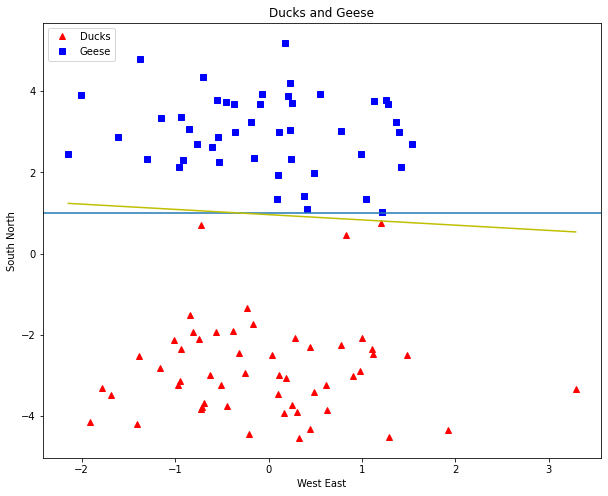

In [24]:
theta, miss_l = perceptron(X, y, 0.5, 100)
plot_decision_boundary(X, theta)

In [25]:
print(miss_l)

[6, 5, 3, 2, 3, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Question: I'm assuming theta stops optimizing after it converges, because it has no way to learn, but it may be possible that there is a more accurate line than the one it converges on, right? 

### (D) Repeat for 1000

In [26]:
X, _= datasets.make_blobs(n_samples=1000,n_features=2,
                           centers=[[0,5], [0,-5]],cluster_std=2.5)

In [27]:
y = np.array([0 if a[1] < 1 else 1 for a in X])

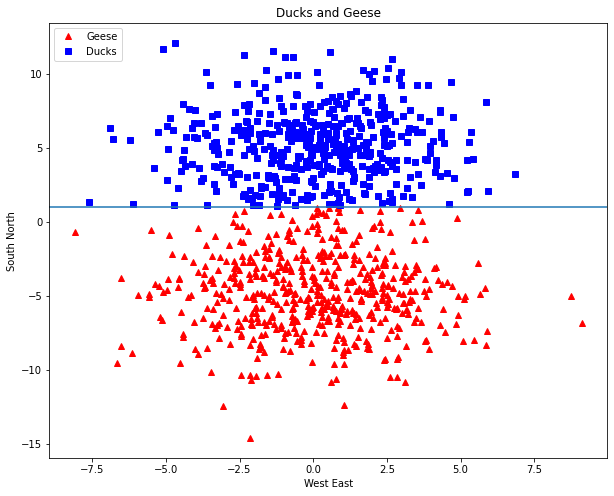

In [28]:
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^', label = "Geese")
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs', label = "Ducks")
plt.axhline(y = 1)
plt.xlabel("West East")
plt.ylabel("South North")
plt.title('Ducks and Geese')
plt.legend(loc="upper left")

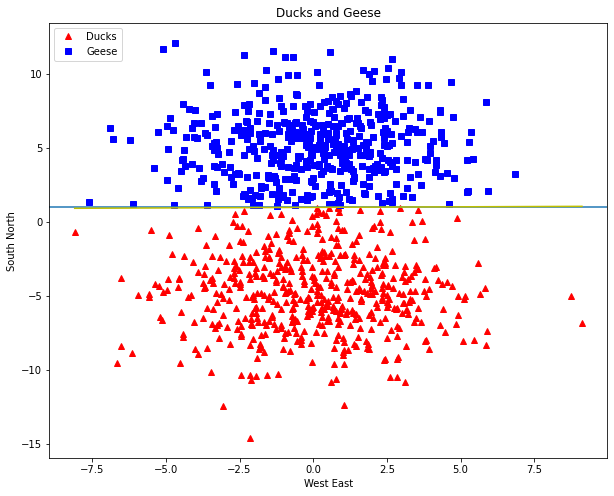

In [29]:
theta, miss_l = perceptron(X, y, 0.5, 100)
plot_decision_boundary(X, theta)

In [30]:
print(miss_l)

[24, 11, 1, 4, 4, 5, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


I played around with the standard deviation a bit to see how it impacted convergance. Intuitive that with a lower standard deviation and centers further away from each other convergence would be easier. At std 1 convergence happens after 1 cycle, mislabeling 1 point. At std 2.5 PLA needs several dozen epochs to converge.

### (F) Modify so that R^10 instead of R^2. How many updates?

To do this, we update n_features in the dataset to 10, which creates ten columns rather than 2. 

In [31]:
X, _= datasets.make_blobs(n_samples=1000,n_features=10,
                           centers=[[0,5], [0,-5]],cluster_std=2.5)

In [32]:
y = np.array([0 if a[1] < 1 else 1 for a in X])

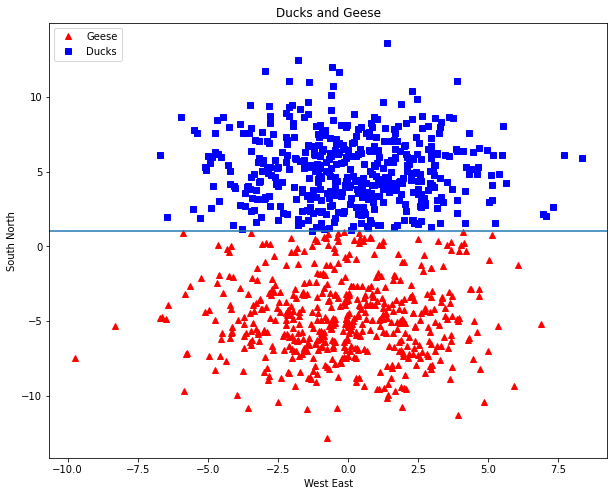

In [33]:
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^', label = "Geese")
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs', label = "Ducks")
plt.axhline(y = 1)
plt.xlabel("West East")
plt.ylabel("South North")
plt.title('Ducks and Geese')
plt.legend(loc="upper left")

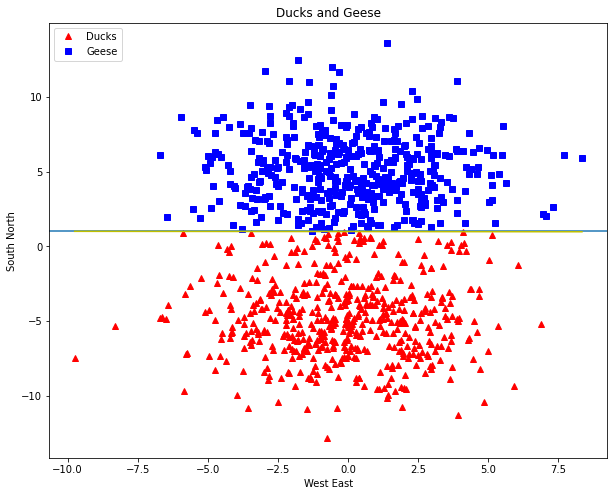

In [34]:
theta, miss_l = perceptron(X, y, 0.5, 100)
plot_decision_boundary(X, theta)

In [35]:
print(miss_l)

[22, 7, 11, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### (G) Repeat f for 100 experiments. In the iteration of each experiment, pick x(t) randomly instead of deterministically. Plot a histogram for the number of updates that the algorithm takes to converge

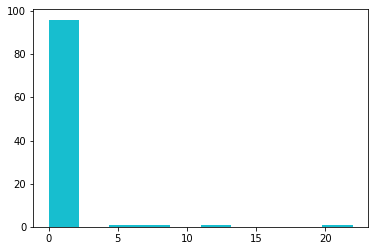

In [47]:
for x in range(100):
    
    perceptron(X, y, .5, 10)
    theta, miss_l = perceptron(X, y, 0.5, 10)
    plt.hist(miss_l)

(h) PLA classifies data and then updates parameters based on recognizing errors. It's fascinating to see how useful "errors" can be in machine learning. When the model stops finding misclasified points, it converges and no longer improves. I'm interested in the broader implications here. Is it the case that the converged model has reached the most accurate dividing line? Or if it is "easy" to clasify, could it be that the line never actually becomes optimal because there were not enough misclassifications? 

epochs = 100
w_hat = 0
error = number of data points
conditional statement inside for loop that compares 
inside to outside, and if condition is met, update 
the variable outside the for loop
for t in epochs
w_hat = np.zeroes((n+1,1))
    perceptron
    
    E_in is missed? 